#Business Requirement:
“MyNextMovie” is a budding startup in the space of recommendations on top of various OTT platforms providing suggestions to its customer base regarding their next movie.Their major business is to create a recommendation layer on top of these OTT platformsso that they can make suitable recommendations to their customers, however, since they are in research mode right now, they would want to experiment with open-source data first to understand the depth of the models which can be delivered by them. The data for this exercise is open-source data that has been collected and made available from the MovieLens website(http://movielens.org).

https://www.kaggle.com/code/ayushimishra2809/movie-recommendation-system/data?select=ratings.csv

### All Imports

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

### Constants

In [ ]:
MOVIES = pd.read_csv("/content/drive/MyDrive/Machine Learning/Edureka/Final Project/movies.csv")
RATINGS = pd.read_csv("/content/drive/MyDrive/Machine Learning/Edureka/Final Project/ratings.csv")


moive_data = MOVIES.copy()
ratinig_data = RATINGS.copy()


### Data Cleaning

In [ ]:
print("Number of Null Values in Movie Data :",moive_data.isnull().any().sum())
print("\nNumber of Null Values in Ratining Data :",ratinig_data.isnull().any().sum())

print("\n\nAny Duplicate Values in Movie Data :",moive_data.duplicated().any())
print("\nAny Duplicate Values in Ratining Data :",ratinig_data.duplicated().any())

Number of Null Values in Movie Data : 0

Number of Null Values in Ratining Data : 0


Any Duplicate Values in Movie Data : False

Any Duplicate Values in Ratining Data : False


In [ ]:
# Combining both data sets
movie_ids = moive_data["movieId"].unique()
user_ids = ratinig_data["userId"].unique()
all_movies = moive_data["title"].unique()

moive_rating_data = MOVIES.copy()

genres = []
genres_set = []
for s in moive_data["genres"]:
  s = s.split("|")
  genres_set.append(s)
  for w in s:
    genres.append(w)

all_genres = list(set(genres))


no_of_rating = {}
average_rating = {}
for id in movie_ids:
  movie = ratinig_data[ratinig_data["movieId"]==id]
  no_of_rating[id] = movie.shape[0]
  average_rating[id] = round(movie["rating"].mean(), 2)

moive_rating_data["No_of_views"] = no_of_rating.values()
moive_rating_data["Average_rating"] = average_rating.values()
moive_rating_data["genres"] = genres_set

### Exploratory Data Analysis (EDA) 

In [ ]:
print("Total Number of Users :", len(user_ids))
print("Total Number of Moives :", len(movie_ids))

Total Number of Users : 668
Total Number of Moives : 10329


In [ ]:
print("Total Number of Differant Genres :", len(set(genres)))

print(all_genres[:10])
print(all_genres[10:20])

Total Number of Differant Genres : 20
['Thriller', 'Action', 'Animation', '(no genres listed)', 'IMAX', 'Horror', 'Comedy', 'Romance', 'Adventure', 'Film-Noir']
['Drama', 'Fantasy', 'Western', 'Crime', 'Musical', 'Sci-Fi', 'War', 'Documentary', 'Children', 'Mystery']


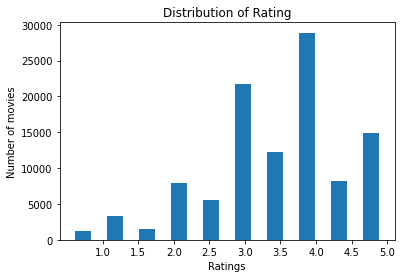

In [ ]:
plt.hist(ratinig_data["rating"], bins=10, rwidth=0.5)
plt.title("Distribution of Rating")
plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel("Ratings")
plt.ylabel("Number of movies")
plt.show()

#Popularity-Based Recommender System

---



### Data Preprocessing

In [ ]:
moive_data = MOVIES.copy()
ratinig_data = RATINGS.copy()

### Popularity-Based Model

In [ ]:
def Popularity_Based(genre, threshold=3, Num_recom= 10, minimum_views=100):
  """ This function return top rated moives for the give Genre.
      input:
        genre: (string) ex == "Adventure", "Animation", "Children", "Comedy", "Fantasy" 
        threshold: 3 (int/float) ex == 3, 3.5, 4, 5
        Num_recom: 10 (int) ex == 5, 7 ,10, 20
        minimum_views: 100 (int) ex = 50, 100, 200, 500

      output:
        It will return a DataFrame with 
        column: ("title", "Average_rating", "No_of_views")
        rows: Num_recom
  """
  all_recom = pd.DataFrame(columns=moive_data.columns)
  for i in range(moive_rating_data.shape[0]):
    moive = moive_rating_data.iloc[i]
    if moive["Average_rating"] >= threshold and moive["No_of_views"] >= minimum_views:
        if genre in moive["genres"]:
          all_recom = all_recom.append(moive)
          
  if all_recom.shape[0] >= Num_recom:
    all_recom = all_recom.sort_values(by="Average_rating", ascending=False)[:Num_recom]
  elif all_recom.shape[0] == 0:
    print("No Moives For Your Request...!")
    return 

  all_recom.drop(columns=["movieId", "genres"], inplace=True)
  all_recom.index = list(range(1, all_recom.shape[0]+1))
  all_recom.columns =["Moive Name", "Average Rating", "No of Views"]
  print(f"These Are Top {all_recom.shape[0]} Moives")
  return all_recom

### Popularity-Based Prediction

In [ ]:
Popularity_Based(genre="Fantasy", threshold=4, Num_recom= 5, minimum_views=100)

These Are Top 5 Moives


,Moive Name,Average Rating,No of Views
1,Monty Python and the Holy Grail (1975),4.30,154.0
2,"Princess Bride, The (1987)",4.16,171.0
3,"Lord of the Rings: The Fellowship of the Ring,...",4.13,189.0
4,"Lord of the Rings: The Return of the King, The...",4.11,166.0
5,"Lord of the Rings: The Two Towers, The (2002)",4.10,167.0


#Content-Based Recommender System

### Data Preprocessing

In [ ]:
moive_data = MOVIES.copy()
ratinig_data = RATINGS.copy()

top_N_movie = 10
based_on_title = "Four Rooms (1995)"

moive_rating_data["genres"] = moive_data["genres"]

movie = pd.DataFrame(columns=moive_rating_data.columns)

### Content-Based Model

In [ ]:
def content_based(based_on_title = "Toy Story (1995)", top_N_movie = 10):
  """
  This function return a dataframe with top_N_movie name, which are similar to given title.
  Input:
    based_on_title: "Toy Story (1995)" (Str) name of the movie.
    top_N_movie: 5 (Int) Number of similar movie need to return.
  Output:
    DataFrame with one column with movie name, and rows of number top_N_movie.
  """
  # See whether requisted movie is in our dataframe or not 
  if based_on_title not in moive_data["title"].values:
    print(f"We Don't Have Movie : '{based_on_title}' \n")
    return

  # Genres of given movie
  genre_of_given_movie = moive_rating_data[moive_rating_data['title']==based_on_title]["genres"].values[0]

  # Get Similar movies
  movie = pd.DataFrame(columns=moive_rating_data.columns)
  const=0
  count = 0
  while len(movie)<=top_N_movie and count < 25:
    x = genre_of_given_movie.split("|")
    similer_genre_of_given_movie = random.sample(x, k=(len(x)-const))
    const = 1
    count += 1
    similer_genre_of_given_movie.sort()
    similer_genre_of_given_movie = "|".join(similer_genre_of_given_movie)
    similer_movie = moive_rating_data[moive_rating_data["genres"]==similer_genre_of_given_movie]
    similer_movie = similer_movie.sort_values(by="No_of_views", ascending=False)
    movie = movie.append(similer_movie)
    movie.drop_duplicates(inplace=True)

  # Removing the given movie from DF
  movie.set_index("title", inplace=True, drop=False)
  movie.drop(based_on_title, inplace=True)

  # If requeste number of movies are more then avalable movies 
  if len(movie) < top_N_movie:
    print(f"We Have Only '{len(movie)}'' Top Movies Which Are Similar To Movie '{based_on_title}'...!")
    movie = movie.drop(columns=["movieId", "genres", "No_of_views", "Average_rating"])
    movie.index = list(range(1, len(movie)+1))
    return movie

  # Returning the DF
  movie = movie.drop(columns=["movieId", "genres", "No_of_views", "Average_rating"]).iloc[0:top_N_movie]
  movie.index = list(range(1, top_N_movie+1))
  return movie


### Content-Based Prediction

In [ ]:
content_based(based_on_title ="Ichi the Killer (Koroshiya 1) (2001)", top_N_movie=5)

,title
1,Manhunter (1986)
2,Bad Boys (1995)
3,Money Train (1995)
4,"Last Boy Scout, The (1991)"
5,Metro (1997)


#Collaborative Based Recommender System

### Data Preprocessing

In [ ]:
moive_data = MOVIES.copy()
ratinig_data = RATINGS.copy()

#Merge both movie and rating data
data = pd.merge(moive_data, ratinig_data, on="movieId")

# Drop unwanted columns
data.drop(columns=["genres", "timestamp", "title"], inplace=True)

#Create a sparse_matrix with row as movieId, column as userId and values as rating
sparse_matrix = pd.pivot_table(data, columns=["userId"], index=["movieId"], values="rating").fillna(0)

# create corr matrix, so that we can know the correlation between the users.
cor = sparse_matrix.corr(method="pearson")

### Collaborative-Based Model

In [ ]:
def collaborative_based(userid=1, number_of_recom=5, k = 100):
  """
  It will return a dataframe with N recommandation based on K similar users.
  Input: 
    userid: 1 (Int) For which user you want to recommend moives.
    number_of_recom: 5 (Int) How many movies you want to recommend.
    k: 100 (Int) With how many similar usere you want to compare. 
  
  Output:
    DataFrame with N rows, and one column names, movie names
  """
  if userid not in user_ids:
    print("Welcome You Are New User...! \n Here Are Top Movies\n")
    out = ((moive_rating_data.sort_values("No_of_views", ascending=False)).get("title").iloc[:number_of_recom])
    out.index=list(range(1, number_of_recom+1))
    return out

  # These are "k" most similar users
  k_similar_users = (cor[userid].sort_values(ascending=False).iloc[1:k+1]).index
  k_similar_users_corr = cor[userid].sort_values(ascending=False).iloc[1:k+1]

  # k users sparse matrix
  k_users_sparse = sparse_matrix.get(k_similar_users)

  # removing the movies which all k users not yet watched, and movie watched by given user
  movies_watched_by_given_user = (data[data["userId"] == userid]).get("movieId").tolist()
  x = k_users_sparse.sum(axis=1)
  y = x[x.values!=0].index
  final_movie_ids = [i for i in y if i not in movies_watched_by_given_user]
  final_sparse = k_users_sparse.loc[final_movie_ids]
  
  # Data Frame of top N movies
  recommend = {}
  for i in final_movie_ids:
    recommend[i] = round((final_sparse.loc[i]*k_similar_users_corr).sum(), 1)

  # if number_of_recom requested is more then limit
  if number_of_recom > len(recommend):
    number_of_recom = len(recommend)

  # if number_of_recom requested is less or equal to zero
  elif number_of_recom <= 0:
      number_of_recom = 5


  top_N_movie_ids = [x[0] for x in sorted(recommend.items(), key=lambda x:x[1])[-number_of_recom:]]
  movies = moive_data.set_index("movieId").loc[top_N_movie_ids].drop(columns=["genres"])
  movies.index = list(range(1, len(top_N_movie_ids)+1))
  return movies

### Collaborative-Based Prediction

In [ ]:
collaborative_based(userid=53, number_of_recom=5, k = 100)

,title
1,Star Wars: Episode V - The Empire Strikes Back...
2,Raiders of the Lost Ark (Indiana Jones and the...
3,"Lord of the Rings: The Fellowship of the Ring,..."
4,Pulp Fiction (1994)
5,"Matrix, The (1999)"


# Final Predictions:

In [ ]:
print(all_genres[:10])
print(all_genres[10:20])

['Thriller', '(no genres listed)', 'Drama', 'Documentary', 'Animation', 'Mystery', 'Horror', 'Crime', 'Children', 'Adventure']
['Action', 'War', 'Romance', 'IMAX', 'Fantasy', 'Musical', 'Sci-Fi', 'Comedy', 'Western', 'Film-Noir']


In [ ]:
print("Here You See Most Popular Movie By it's Genre.")
p = input("Please Enter The Genre : ")
q = abs(float(input("Please Enter Minimum Rating of The Movie : ")))
r = abs(int(input("Please How much Movies We should Recommend You : ")))
s = abs(int(input("As Per You How Many Number of Ratings Should be there on Movie : ")))
Popularity_Based(p , q, r, s)

Here You See Most Popular Movie By it's Genre.
Please Enter The Genre : Animation
Please Enter Minimum Rating of The Movie : 4
Please How much Movies We should Recommend You : 10
As Per You How Many Number of Ratings Should be there on Movie : 50
These Are Top 6 Moives


,Moive Name,Average Rating,No of Views
1,Wallace & Gromit: A Close Shave (1995),4.16,55.0
2,Wallace & Gromit: The Wrong Trousers (1993),4.17,77.0
3,"Iron Giant, The (1999)",4.00,51.0
4,Princess Mononoke (Mononoke-hime) (1997),4.38,52.0
5,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.24,72.0
6,Up (2009),4.15,62.0


In [ ]:
print(all_movies[:20])

['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)'
 'Waiting to Exhale (1995)' 'Father of the Bride Part II (1995)'
 'Heat (1995)' 'Sabrina (1995)' 'Tom and Huck (1995)'
 'Sudden Death (1995)' 'GoldenEye (1995)' 'American President, The (1995)'
 'Dracula: Dead and Loving It (1995)' 'Balto (1995)' 'Nixon (1995)'
 'Cutthroat Island (1995)' 'Casino (1995)' 'Sense and Sensibility (1995)'
 'Four Rooms (1995)' 'Ace Ventura: When Nature Calls (1995)'
 'Money Train (1995)']


In [ ]:
print("Here You See Similar Movie Like You Enter.")
x = input("Please Enter The Movie Name, I will Recomment Movie Like That : ")
y = abs(int(input("Please How much Movies We should Recommend You : ")))
content_based(x, y)

Here You See Similar Movie Like You Enter.
Please Enter The Movie Name, I will Recomment Movie Like That : Money Train (1995)
Please How much Movies We should Recommend You : -10


,title
1,Bad Boys (1995)
2,"Last Boy Scout, The (1991)"
3,Metro (1997)
4,Another 48 Hrs. (1990)
5,Wasabi (2001)
6,"Business, The (2005)"
7,Into the Night (1985)
8,Bronson (2009)
9,Dead Fish (2004)
10,Pulp Fiction (1994)


In [ ]:
print(user_ids[:40])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [ ]:
print("Here You Will See Best Movies For You.")
a = int(input("Please Enter Your User_Id : "))
b = abs(int(input("Please How much Movies We should Recommend You : ")))
c = abs(int(input("As Per You How Many Number of Ratings Should be there on Movie : ")))
collaborative_based(a, b, c)

Here You Will See Best Movies For You.
Please Enter Your User_Id : 1
Please How much Movies We should Recommend You : 10
As Per You How Many Number of Ratings Should be there on Movie : 5


,title
1,Toy Story (1995)
2,Indiana Jones and the Last Crusade (1989)
3,Dumb & Dumber (Dumb and Dumber) (1994)
4,Finding Nemo (2003)
5,"Green Mile, The (1999)"
6,X-Men (2000)
7,"Lion King, The (1994)"
8,Good Will Hunting (1997)
9,Pirates of the Caribbean: The Curse of the Bla...
10,Memento (2000)
